In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Polynomial interpolation
def interpolation(t, y):
    # Get t_cols - 1 rows of t
    arr = np.expand_dims(t, 1)
    outer = np.ones([t.size-1])

    # Outer product to create matrix
    A = outer * arr
    
    # Add ones column to the front
    A = np.append(np.ones([t.size,1]), A, axis = 1)

    # Take values to the power
    for col in range(2, A.shape[1]):
        mult = A[:,col]
        for i in range(1,col):
                A[:,col] = A[:,col] * mult

    # Solve system of equations
    c = np.linalg.solve(A, y)
    c = c.round(10)
    return c

In [3]:
t = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
c = interpolation(t, y)
c

array([ 0.,  0.,  1., -0.])

In [4]:
# Get points
def tVal(k): 
    return math.cos(((2*k-1)*math.pi)/22)

def yVal(t):
    return (1 / (1 + (25 * t * t)))
    
x = np.array([])
for i in range(1,11):
    x = np.append(x, tVal(i))    
    
y = np.array([])
for i in x: 
    y = np.append(y, yVal(i))

[-153.05792433   67.76192754  123.18833883 -167.35606021   96.67732518
  -57.97150984   31.79020257  -10.87139116    0.            1.        ]


(0.0, 1.0)

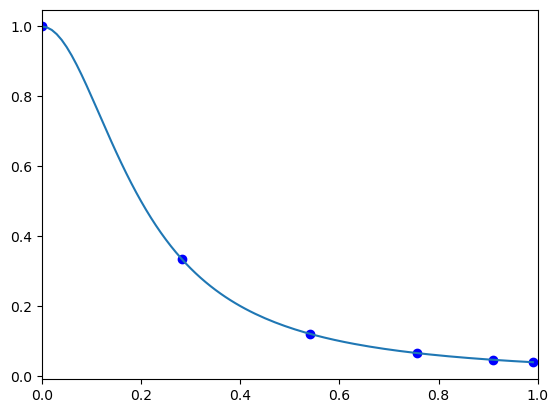

In [7]:
# Plot
p_x = np.array([])
p_y = np.array([])

# Function
for i in range(-100, 100):
    p_x = np.append(p_x, i / 100)
    temp_y = yVal(i / 100)
    p_y = np.append(p_y, temp_y)


# Interpolation
coeffs = interpolation(x, y)
coeffs = np.flip(coeffs)
print(coeffs)

p1_x = np.linspace(-1, 1, 200)
p1_y = np.polyval(coeffs, p1_x)

plt.plot(p_x, p_y)
# plt.plot(p1_x, p1_y)
plt.scatter(x, y, color = "blue")
plt.xlim(0, 1)

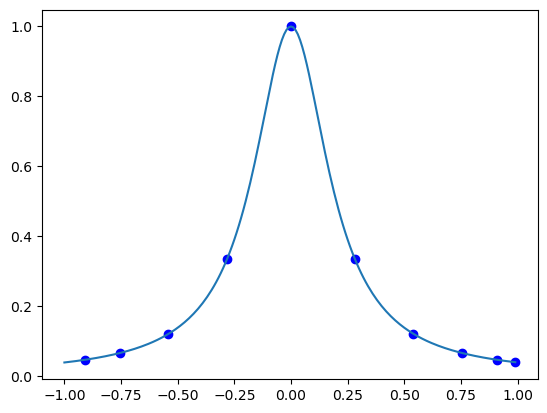

In [6]:
plt.plot(p_x, p_y)
# plt.plot(p1_x, p1_y)
plt.scatter(x, y, color = "blue")